# **CIFAR -10 DATASETS**

The aim is to build a multilayer perecptron which will classify test images in 10 different categories(classes) using Tanh as an activation function for hidden layer.

Steps followed to build a MLP

1.  Load libraries keras for accessing layers, activations and optimizers, matplotlib for plotting accuracies and numpy because the input data is stored in arrays

2. Load the cifar-10 datasets

3. Load model type, activations, layers to be used and optimizers which are used

4. Categorize the labels of test to 10 classes as our output will one of the 10 categories

5. Normalize Data 

6. Start adding layers to model, compile the model, then fit the model where the training of data happens and finally in evaluate you test your model against the test data.

7. Plot your validation accuracy to check the accuracy of your model.

8. To modify your accuracies you tweak hyperparameters and repeat the process.

In [1]:
import keras
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

In [0]:
from keras.models import Sequential


from keras.layers import Activation, Dense, Dropout, Flatten

from keras.optimizers import rmsprop, SGD


In [0]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [0]:


# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = train_images.astype('float32')
X_test = test_images.astype('float32')

# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

#Model one parameters

Selected the values randomly which people generally start with.

1.   Hidden layers = 3
2.   hidden_num_units = 2048, 1024, 512
3.   output_num_units = 10
4.   epochs = 20
5.   batch_size = 128
6.   output activation_function = 'Relu'
7.   layer activation_function = "tanh"


In [0]:


model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(2048, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))


model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [0]:
#def fitTheModel():
  
  history1 = model.fit(X_train, train_labels, epochs=20, batch_size=128, validation_data=(X_test,test_labels))
  
  score1 = model.evaluate(X_test,test_labels)
  
  

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 14s 280us/step - loss: 2.2543 - acc: 0.1512 - val_loss: 2.2215 - val_acc: 0.1873
Epoch 2/20
50000/50000 [==============================] - 12s 242us/step - loss: 2.1866 - acc: 0.1743 - val_loss: 2.0999 - val_acc: 0.1841
Epoch 3/20
50000/50000 [==============================] - 12s 235us/step - loss: 2.1403 - acc: 0.1839 - val_loss: 2.0620 - val_acc: 0.2050
Epoch 4/20
50000/50000 [==============================] - 12s 240us/step - loss: 2.1137 - acc: 0.1958 - val_loss: 2.0817 - val_acc: 0.2117
Epoch 5/20
50000/50000 [==============================] - 12s 245us/step - loss: 2.1044 - acc: 0.2120 - val_loss: 2.0634 - val_acc: 0.2158
Epoch 6/20
50000/50000 [==============================] - 12s 233us/step - loss: 2.0834 - acc: 0.2267 - val_loss: 2.0276 - val_acc: 0.2420
Epoch 7/20
50000/50000 [==============================] - 12s 235us/step - loss: 2.0802 - acc: 0.2382 - val_loss: 2.

In [0]:
  print('Test loss:', score1[0])
  print('Test accuracy:', score1[1])

Test loss: 1.9879794591903686
Test accuracy: 0.2989


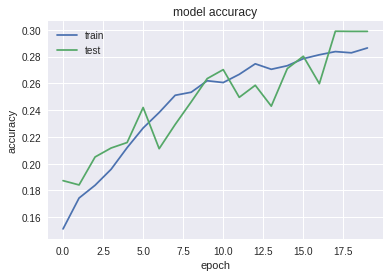

In [0]:
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

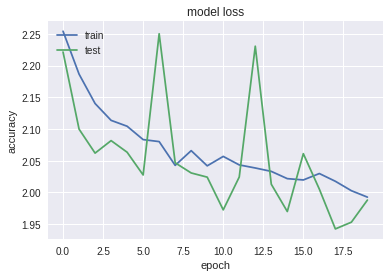

In [0]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model two parameters

To improve I changed my output activation to softmax which is the best for multiclass problems assuming it would improve my accuracy.

1.   Hidden layers = 3
2.   hidden_num_units = 2048, 1024, 512
3.   output_num_units = 10
4.   epochs = 40
5.   batch_size = 128
6.   output activation_function = 'softmax'
7.   layer activation_function = "tanh"


In [0]:


model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(2048, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))


model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [0]:
#def fitTheModel():
  
  history1 = model.fit(X_train, train_labels, epochs=40, batch_size=128, validation_data=(X_test,test_labels))
  
  score1 = model.evaluate(X_test,test_labels)
  
  

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 13s 258us/step - loss: 2.8532 - acc: 0.0996 - val_loss: 2.3452 - val_acc: 0.1000
Epoch 2/40
50000/50000 [==============================] - 12s 230us/step - loss: 2.4656 - acc: 0.0985 - val_loss: 2.4402 - val_acc: 0.1000
Epoch 3/40
50000/50000 [==============================] - 12s 235us/step - loss: 2.4301 - acc: 0.0996 - val_loss: 2.4226 - val_acc: 0.1000
Epoch 4/40
50000/50000 [==============================] - 11s 227us/step - loss: 2.4000 - acc: 0.1023 - val_loss: 2.3393 - val_acc: 0.1000
Epoch 5/40
50000/50000 [==============================] - 11s 227us/step - loss: 2.3874 - acc: 0.1002 - val_loss: 2.4342 - val_acc: 0.1000
Epoch 6/40
50000/50000 [==============================] - 12s 231us/step - loss: 2.3751 - acc: 0.1004 - val_loss: 2.4455 - val_acc: 0.1000
Epoch 7/40
50000/50000 [==============================] - 12s 232us/step - loss: 2.3682 - acc: 0.1005 - val_loss: 2.

In [0]:
  print('Test loss:', score1[0])
  print('Test accuracy:', score1[1])

Test loss: 2.3997065254211427
Test accuracy: 0.1


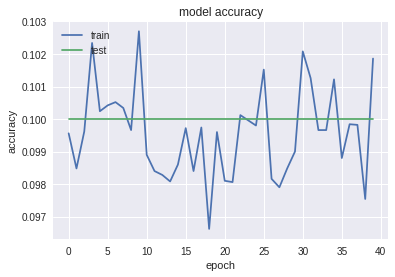

In [0]:
# summarize history for accuracy
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

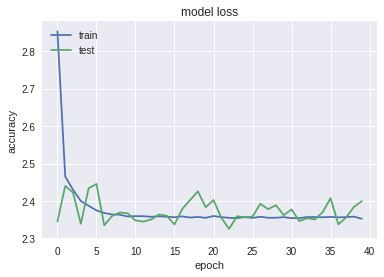

In [0]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model three parameters

It rather gave an accuracy of 0.1 thus having to change my hyperparameters I used Relu as my output activation function

1.   Hidden layers = 3
2.   hidden_num_units = 2048, 1024, 512
3.   output_num_units = 10
4.   epochs = 200
5.   batch_size = 128
6.   output activation_function = 'Relu'
7.   layer activation_function = "tanh"


In [0]:


model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(2048, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(1024, activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='relu'))


model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [7]:
#def fitTheModel():
  
  history3 = model.fit(X_train, train_labels, epochs=300, batch_size=128, validation_data=(X_test,test_labels))
  
  score3 = model.evaluate(X_test,test_labels)
  
  

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 8s 159us/step - loss: 2.2686 - acc: 0.1450 - val_loss: 2.2021 - val_acc: 0.1716
Epoch 2/300
50000/50000 [==============================] - 7s 133us/step - loss: 2.1862 - acc: 0.1747 - val_loss: 2.0789 - val_acc: 0.1834
Epoch 3/300
50000/50000 [==============================] - 7s 135us/step - loss: 2.1594 - acc: 0.1890 - val_loss: 2.1090 - val_acc: 0.1973
Epoch 4/300
50000/50000 [==============================] - 7s 134us/step - loss: 2.1326 - acc: 0.2157 - val_loss: 2.0954 - val_acc: 0.2175
Epoch 5/300
50000/50000 [==============================] - 7s 133us/step - loss: 2.1134 - acc: 0.2363 - val_loss: 2.2381 - val_acc: 0.2296
Epoch 6/300
50000/50000 [==============================] - 7s 135us/step - loss: 2.0890 - acc: 0.2445 - val_loss: 2.1372 - val_acc: 0.2323
Epoch 7/300
50000/50000 [==============================] - 7s 138us/step - loss: 2.0882 - acc: 0.2533 - val_loss: 2.

In [8]:
  print('Test loss:', score3[0])
  print('Test accuracy:', score3[1])

Test loss: 1.852130404663086
Test accuracy: 0.3396


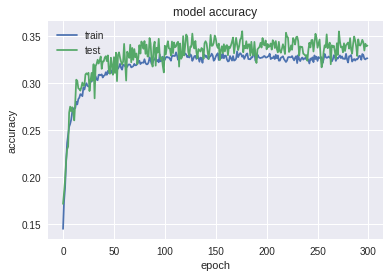

In [9]:
# summarize history for accuracy
plt.plot(history3.history['acc'])
plt.plot(history3.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

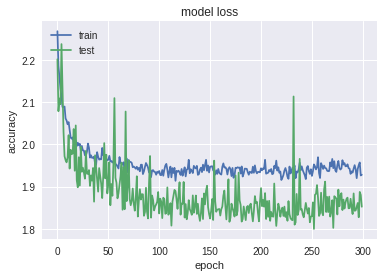

In [10]:
# summarize history for accuracy
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#Model four parameters

Relu did work. Trying different hyperparameters.

1.   Hidden layers = 2
2.   hidden_num_units = 1024, 512
3.   output_num_units = 10
4.   epochs = 5
5.   batch_size = 16
6.   output activation_function = 'tanh'
7.   layer activation_function = "tanh"


In [0]:


model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))



model.add(Dense(512,activation='tanh'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='tanh'))

lrrate = 0.01
epochs = 5
decay = lrrate/epochs

sgd = SGD(lr=lrrate, momentum=0.9, decay=decay, nesterov=False)

model.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])



In [0]:
#def fitTheModel():
  
  history4 = model.fit(X_train, train_labels, epochs=5, batch_size=16, validation_data=(X_test,test_labels))
  
  score4 = model.evaluate(X_test,test_labels)
  
  

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 26s 522us/step - loss: 8.1881 - acc: 0.0992 - val_loss: 8.0623 - val_acc: 0.1000
Epoch 2/5
50000/50000 [==============================] - 21s 426us/step - loss: 8.2421 - acc: 0.1000 - val_loss: 8.0623 - val_acc: 0.1000
Epoch 3/5
50000/50000 [==============================] - 18s 363us/step - loss: 7.2435 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/5
50000/50000 [==============================] - 18s 361us/step - loss: 1.1921e-07 - acc: 0.1000 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/5
10000/10000 [==============================] - 1s 72us/step


In [0]:
  print('Test loss:', score4[0])
  print('Test accuracy:', score4[1])

Test loss: 1.1920930376163597e-07
Test accuracy: 0.1


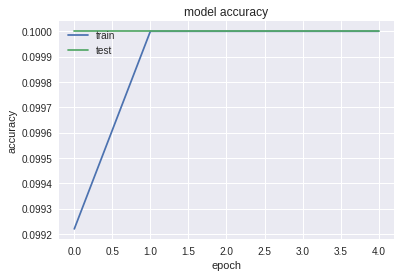

In [0]:
# summarize history for accuracy
plt.plot(history4.history['acc'])
plt.plot(history4.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

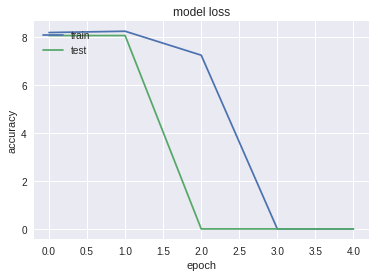

In [0]:
# summarize history for accuracy
plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model 5 failed completely



**Conclusion**

Running different combinations of hyperparameter values for Tanh the best validation accuracy I got is 34% so model 4 is the best amongst all.